In [1]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 200)  # Adjust this number as needed
pd.set_option('display.max_columns', 50)  # Adjust this number as needed

In [3]:
import os
# List all files in the folder
folder_path = '../../data_CityEvent/processed/1.5.4_avg_visits_across_day_of_week_at_cbgid_hour_of_day/'
file_names = os.listdir(folder_path)

# file_names.remove('unscheduled_intermediate') 
# file_names.remove('archive_before_dropping_missing_geometry') 
for file_name in file_names:
    print(file_name)

avg_visits_attended_community_hourly_visits.csv
avg_visits_attended_concerts_hourly_visits.csv
avg_visits_attended_conferences_hourly_visits.csv
avg_visits_attended_expos_hourly_visits.csv
avg_visits_attended_festivals_hourly_visits.csv
avg_visits_attended_performing-arts_hourly_visits.csv
avg_visits_attended_sports_hourly_visits.csv
avg_visits_non_attended_academic_hourly_visits.csv
avg_visits_non_attended_daylight-savings_hourly_visits.csv
avg_visits_non_attended_observances_hourly_visits.csv
avg_visits_non_attended_politics_hourly_visits.csv
avg_visits_non_attended_public-holidays_hourly_visits.csv
avg_visits_non_attended_school-holidays_hourly_visits.csv
avg_visits_unscheduled_airport-delays_hourly_visits.csv
avg_visits_unscheduled_disasters_hourly_visits.csv
avg_visits_unscheduled_health-warnings_hourly_visits.csv
avg_visits_unscheduled_severe-weather_hourly_visits.csv
avg_visits_unscheduled_terror_hourly_visits.csv


In [4]:
import os
import pandas as pd
for file_name in file_names:
    current_df = pd.read_csv(os.path.join(folder_path, file_name))
    current_df.reset_index(drop=True, inplace=True)
    print(f'{file_name}: {current_df.shape}')    
    break
    

avg_visits_attended_community_hourly_visits.csv: (11164, 6)


In [18]:
df = pd.read_csv('../../data_CityEvent/processed/1.5.4_avg_visits_across_day_of_week_at_cbgid_hour_of_day/avg_visits_attended_community_hourly_visits.csv')
display(df.head())

,DAY_OF_WEEK,START_HOUR,BGFIPS,TOTAL_VISITS,AVG_VISITS,EVENTS_COUNT
0,Friday,0,60014229002,7.0,2.333333,3
1,Friday,0,60330013003,0.0,0.000000,4
2,Friday,0,60371252002,2.0,2.000000,1
3,Friday,0,60372032002,0.0,0.000000,1
4,Friday,0,60372374012,0.0,0.000000,1


In [19]:
print(df.shape)
filtered_df = df[df['EVENTS_COUNT'] <= 400]
print(filtered_df.shape)

(11164, 6)
(11135, 6)


In [20]:
filtered_df['EVENTS_CLASS'] = filtered_df['EVENTS_COUNT'].apply(
    lambda x: 1 if x <=10
    else (2 if x <= 50 
          else (3 if x <= 100
                else (4 if x <= 200
                      else (5)))))

C:\Users\HP\AppData\Local\Temp\ipykernel_18260\1283310841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['EVENTS_CLASS'] = filtered_df['EVENTS_COUNT'].apply(


In [21]:
display(filtered_df[:1])

,DAY_OF_WEEK,START_HOUR,BGFIPS,TOTAL_VISITS,AVG_VISITS,EVENTS_COUNT,EVENTS_CLASS
0,Friday,0,60014229002,7.0,2.333333,3,1


In [22]:
filtered_df['PERCENTAGE_VISIT_CHANGE'] = (filtered_df['TOTAL_VISITS'] - filtered_df['AVG_VISITS'])/filtered_df['AVG_VISITS']

C:\Users\HP\AppData\Local\Temp\ipykernel_18260\752607809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PERCENTAGE_VISIT_CHANGE'] = (filtered_df['TOTAL_VISITS'] - filtered_df['AVG_VISITS'])/filtered_df['AVG_VISITS']


In [23]:
display(filtered_df[:1])

,DAY_OF_WEEK,START_HOUR,BGFIPS,TOTAL_VISITS,AVG_VISITS,EVENTS_COUNT,EVENTS_CLASS,PERCENTAGE_VISIT_CHANGE
0,Friday,0,60014229002,7.0,2.333333,3,1,2.0


C:\Users\HP\AppData\Local\Temp\ipykernel_18260\844309055.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='EVENTS_CLASS', y='PERCENTAGE_VISIT_CHANGE', palette='coolwarm')


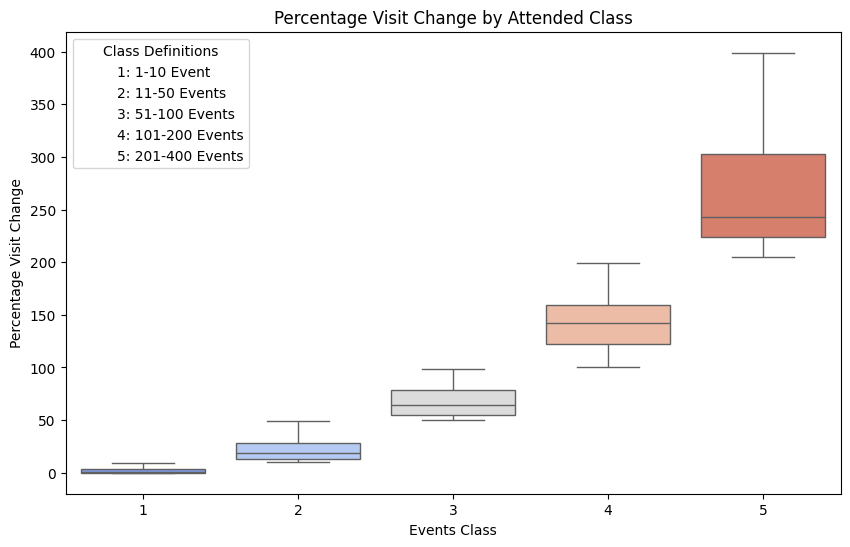

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example mapping of EVENTS_CLASS to descriptions
class_definitions = {
    1: '1-10 Event',
    2: '11-50 Events',
    3: '51-100 Events',
    4: '101-200 Events',
    5: '201-400 Events',
}

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='EVENTS_CLASS', y='PERCENTAGE_VISIT_CHANGE', palette='coolwarm')
plt.xlabel('Events Class')
plt.ylabel('Percentage Visit Change')
plt.title('Percentage Visit Change by Attended Class')

# Map EVENTS_CLASS to descriptions
mapped_labels = [class_definitions.get(cls, f"Class {cls}") for cls in filtered_df['EVENTS_CLASS'].unique()]
handles = [plt.Line2D([0], [0], color='white', label=f'{cls}: {desc}', marker='o', linestyle='') 
           for cls, desc in class_definitions.items()]

# Add the legend at the top-left
plt.legend(handles=handles, title='Class Definitions', loc='upper left', frameon=True, fontsize=10)

# Save the plot
plt.savefig('percentage_visit_change_by_events_class.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [25]:
# CREATED BOX PLOT SUCCESSFULLY

In [27]:
# END -- 25 NOV 2025

### BELOW ARE OLD CODE: IGNORE PLEASE!

In [7]:
# OLD

In [6]:
df['EVENTS_COUNT'].describe()

count    11164.000000
mean        12.920906
std         58.959474
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max       2402.000000
Name: EVENTS_COUNT, dtype: float64

In [54]:

# Define the EVENTS_CLASS column based on the conditions
df['EVENTS_CLASS'] = df['EVENTS_COUNT'].apply(lambda x: 1 if x == 1 else (2 if x <= 3 else (3 if x <= 8 else 4)))

# Display the DataFrame with the new column
display(df.head())

,DAY_OF_WEEK,START_HOUR,BGFIPS,TOTAL_VISITS,AVG_VISITS,EVENTS_COUNT,EVENTS_CLASS
0,Friday,0,60014229002,7.0,2.333333,3,2
1,Friday,0,60330013003,0.0,0.000000,4,3
2,Friday,0,60371252002,2.0,2.000000,1,1
3,Friday,0,60372032002,0.0,0.000000,1,1
4,Friday,0,60372374012,0.0,0.000000,1,1


In [55]:
df['EVENTS_CLASS'].value_counts()

EVENTS_CLASS
1    3425
3    2647
4    2598
2    2494
Name: count, dtype: int64

In [56]:
# Calculate the average of AVG_VISITS for each EVENTS_CLASS
median_visits_per_class = df.groupby('EVENTS_CLASS')['AVG_VISITS'].transform('median')

# Assign the result to the new column TOTAL_AVG_VISITS
df['CLASS_MEDIAN_VISITS'] = median_visits_per_class

# Display the DataFrame with the new column
display(df[:10])

,DAY_OF_WEEK,START_HOUR,BGFIPS,TOTAL_VISITS,AVG_VISITS,EVENTS_COUNT,EVENTS_CLASS,CLASS_MEDIAN_VISITS
0,Friday,0,60014229002,7.0,2.333333,3,2,3.500000
1,Friday,0,60330013003,0.0,0.000000,4,3,6.500000
2,Friday,0,60371252002,2.0,2.000000,1,1,3.000000
3,Friday,0,60372032002,0.0,0.000000,1,1,3.000000
4,Friday,0,60372374012,0.0,0.000000,1,1,3.000000
5,Friday,0,60374636022,0.0,0.000000,1,1,3.000000
6,Friday,0,60450111023,5166.0,6.128114,843,4,8.598387
7,Friday,0,60530004002,9.0,3.000000,3,2,3.500000
8,Friday,0,60590218131,5445.0,68.924051,79,4,8.598387
9,Friday,0,60650512001,8.0,8.000000,1,1,3.000000


In [58]:
# Calculate PERCENTAGE_VISIT_CHANGE
df['PERCENTAGE_VISIT_CHANGE'] = (df['AVG_VISITS'] - df['CLASS_MEDIAN_VISITS']) / df['CLASS_MEDIAN_VISITS']

# Display the DataFrame with the new column
display(df[:10])

,DAY_OF_WEEK,START_HOUR,BGFIPS,TOTAL_VISITS,AVG_VISITS,EVENTS_COUNT,EVENTS_CLASS,CLASS_MEDIAN_VISITS,PERCENTAGE_VISIT_CHANGE
0,Friday,0,60014229002,7.0,2.333333,3,2,3.500000,-0.333333
1,Friday,0,60330013003,0.0,0.000000,4,3,6.500000,-1.000000
2,Friday,0,60371252002,2.0,2.000000,1,1,3.000000,-0.333333
3,Friday,0,60372032002,0.0,0.000000,1,1,3.000000,-1.000000
4,Friday,0,60372374012,0.0,0.000000,1,1,3.000000,-1.000000
5,Friday,0,60374636022,0.0,0.000000,1,1,3.000000,-1.000000
6,Friday,0,60450111023,5166.0,6.128114,843,4,8.598387,-0.287295
7,Friday,0,60530004002,9.0,3.000000,3,2,3.500000,-0.142857
8,Friday,0,60590218131,5445.0,68.924051,79,4,8.598387,7.015928
9,Friday,0,60650512001,8.0,8.000000,1,1,3.000000,1.666667


In [60]:
x = df[df['PERCENTAGE_VISIT_CHANGE']>1]
print(x.shape)

(3861, 9)


In [61]:
x['PERCENTAGE_VISIT_CHANGE'].describe()

count    3861.000000
mean        9.941298
std        23.369800
min         1.000375
25%         2.200000
50%         4.285714
75%         9.333333
max       497.476190
Name: PERCENTAGE_VISIT_CHANGE, dtype: float64

In [62]:
y = df[df['PERCENTAGE_VISIT_CHANGE']<1]
print(y.shape)

(7183, 9)


In [63]:
y['PERCENTAGE_VISIT_CHANGE'].describe()

count    7183.000000
mean       -0.451553
std         0.544124
min        -1.000000
25%        -0.961538
50%        -0.636560
75%        -0.093465
max         0.998195
Name: PERCENTAGE_VISIT_CHANGE, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_13344\3636563785.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EVENTS_CLASS', y='PERCENTAGE_VISIT_CHANGE', palette='coolwarm')


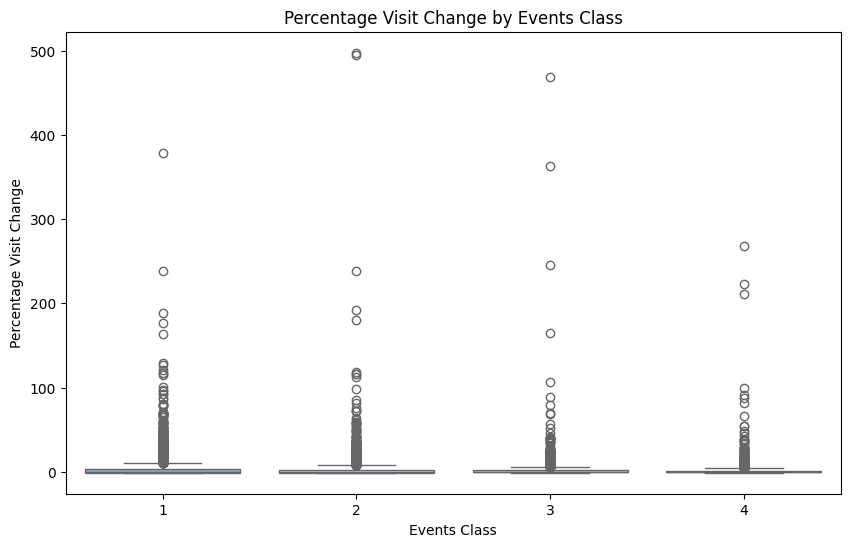

In [59]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='EVENTS_CLASS', y='PERCENTAGE_VISIT_CHANGE', palette='coolwarm')
plt.xlabel('Events Class')
plt.ylabel('Percentage Visit Change')
plt.title('Percentage Visit Change by Events Class')
plt.show()


In [34]:
print(df['PERCENTAGE_VISIT_CHANGE'].dtype)


float64


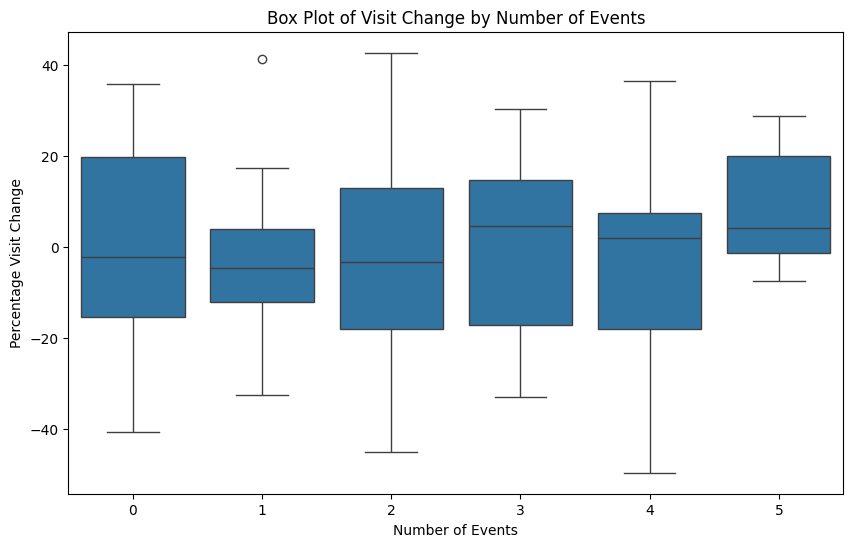

In [35]:
import pandas as pd
import numpy as np

# Create a sample dataset
data = {
    'EVENTS_COUNT': np.random.choice([0, 1, 2, 3, 4, 5], 100),  # Number of events
    'PERCENTAGE_VISIT_CHANGE': np.random.normal(loc=0, scale=20, size=100)  # Visit percentage change
}
dff = pd.DataFrame(data)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='EVENTS_COUNT', y='PERCENTAGE_VISIT_CHANGE', data=dff)
plt.xlabel('Number of Events')
plt.ylabel('Percentage Visit Change')
plt.title('Box Plot of Visit Change by Number of Events')
plt.show()


In [36]:
dff.head()

,EVENTS_COUNT,PERCENTAGE_VISIT_CHANGE
0,3,25.320815
1,1,-11.842952
2,1,-16.431513
3,5,12.021277
4,2,-11.546751
